In [26]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from scipy import stats

In [27]:

# Load the dataset
gas_turbines_df = pd.read_csv('data/gas_turbines.csv')


# EDA

In [28]:
gas_turbines_df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [29]:
missing_values = gas_turbines_df.isnull().sum()
missing_values
#Data given doesn't have any missing values

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

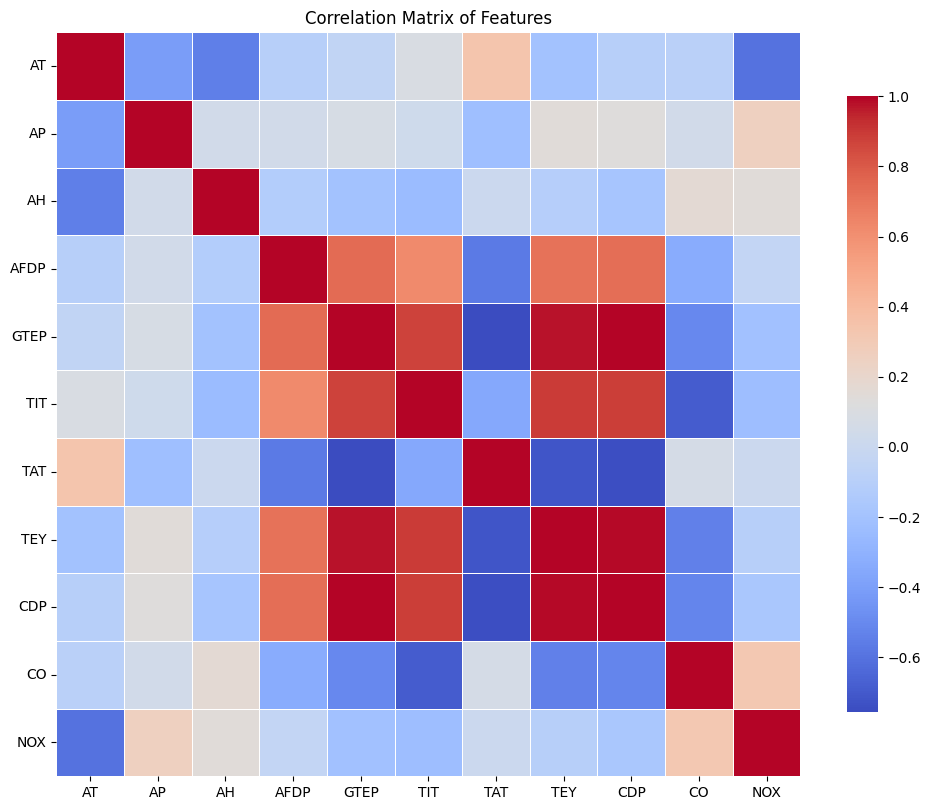

In [30]:
# Calculate the correlation matrix
correlation_matrix = gas_turbines_df.corr()

plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, cbar_kws={"shrink": 0.8}, square=True)

# Rotate y-axis label
plt.yticks(rotation=0)

# Title and display the plot
plt.title('Correlation Matrix of Features')
plt.show()


#### GTEP and TEY are negatively correlated
#### TEY and AP doesn't have any correlation

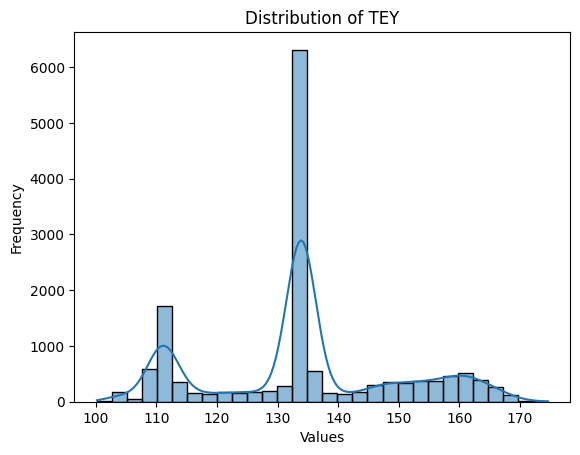

In [31]:

sns.histplot(gas_turbines_df['TEY'], kde=True, bins=30)
plt.title('Distribution of TEY')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Feature Engineering
### As it is mentioned in problem statement that only ambient variables are features, so selecting those features for modelling

In [32]:
# Select relevant columns  that have good correlation(either positive or negative)
selected_columns = ['AT','AH','AFDP','GTEP','TIT','TAT','TEY','CDP','CO','NOX']
gas_turbines_df = gas_turbines_df[selected_columns]


In [33]:
gas_turbines_df.head()

,AT,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


# Finding Outliers

In [34]:
# Calculating z-scores for 'TEY'
z_scores = stats.zscore(gas_turbines_df['TEY'])
threshold = 3

# Identifying outlier indices
outlier_indices = gas_turbines_df[np.abs(z_scores) > threshold].index
print("Number of outliers: ",len(outlier_indices))

Number of outliers:  0


# Modelling

In [35]:


X = gas_turbines_df.drop('TEY', axis=1)  # Features
y = gas_turbines_df['TEY']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Decision Tree RMSE: 0.9448987126288512


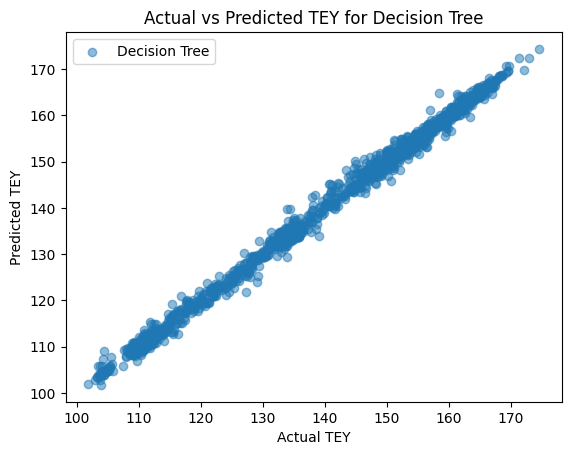

Random Forest RMSE: 0.6329304627798854


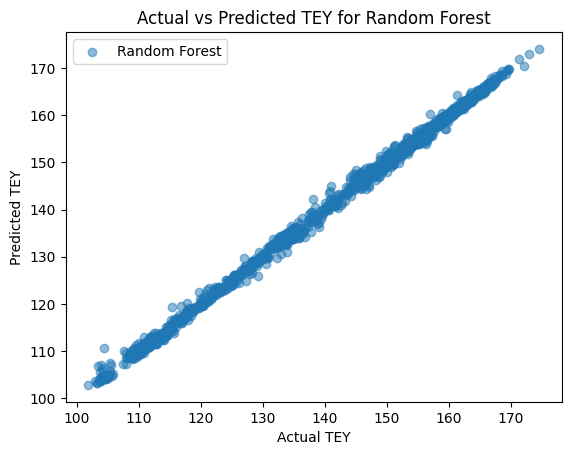

Gradient Boosting RMSE: 0.8437141052170344


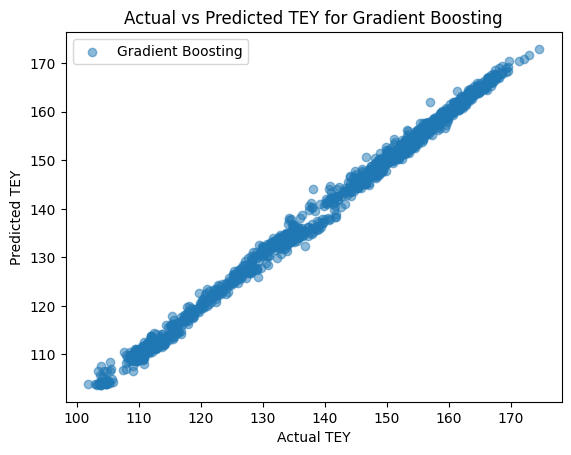

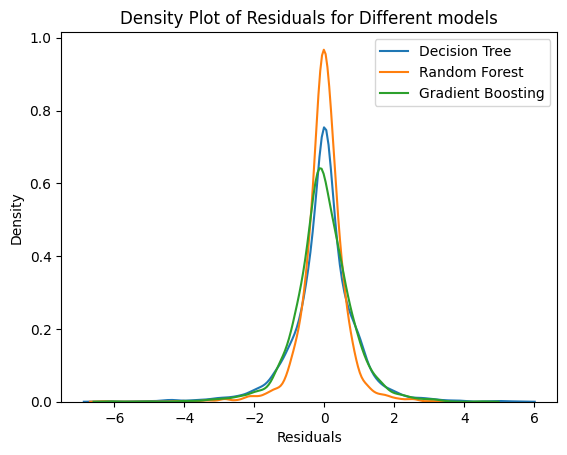

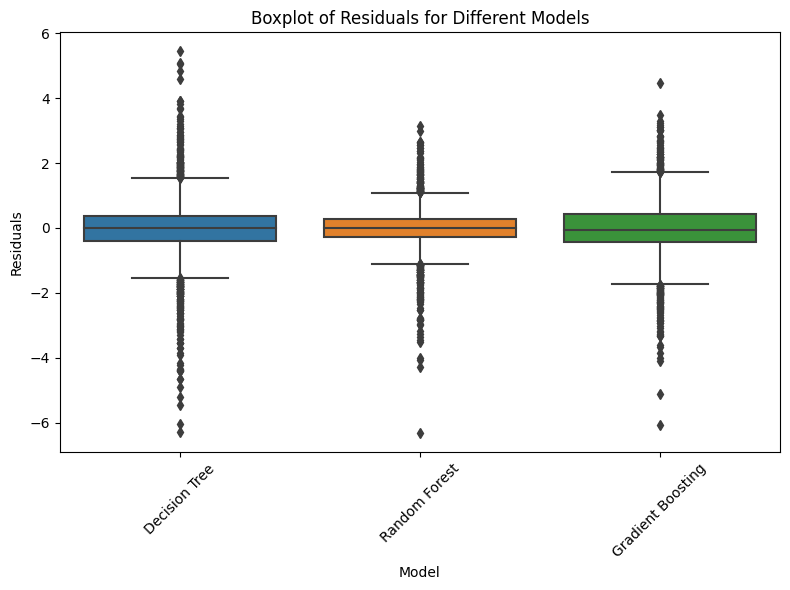

In [36]:

# Initialize models
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    print(f"{name} RMSE: {rmse}")

    # Plotting actual vs predicted values for each model
    plt.scatter(y_test, predictions, alpha=0.5, label=name)

    # Plot settings
    plt.xlabel('Actual TEY')
    plt.ylabel('Predicted TEY')
    plt.title('Actual vs Predicted TEY for '+ name)
    plt.legend()
    plt.show()

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    residuals = y_test - predictions
    sns.kdeplot(residuals, label=name)

plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Density Plot of Residuals for Different models')
plt.legend()
plt.show()

residual_data = {name: y_test - model.predict(X_test) for name, model in models.items()}
plt.figure(figsize=(8, 6))
sns.boxplot(data=pd.DataFrame(residual_data))
plt.xlabel('Model')
plt.ylabel('Residuals')
plt.title('Boxplot of Residuals for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





# Neural Networks modelling with hyper parameter tuning and different hidden layer sizes(best fit model)

In [37]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generating sample data (Replace this with your X_clean and y_clean data)
X_clean, y_clean = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Initialize the MLP Regressor
model = MLPRegressor(random_state=42)

# hyperparameters to tune
parameters = {
    'hidden_layer_sizes': [(40,), (50,), (30, 40,), (50, 50,), (50, 30, 20,), (50, 30, 20, 40,),(50, 30, 20, 40, 50),(50, 30, 20, 40, 50,60, 70, 40, 30)  ],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
}

# Use StandardScaler within GridSearchCV
scaler = StandardScaler()
grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring='neg_root_mean_squared_error', cv=5)

# Scale the data within the grid search
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the grid search on scaled data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_model.predict(X_test_scaled)

# Calculate RMSE (Root Mean Squared Error) with the best model
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Root Mean Squared Error with best model: {rmse}")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Root Mean Squared Error with best model: 0.8215111052648756


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


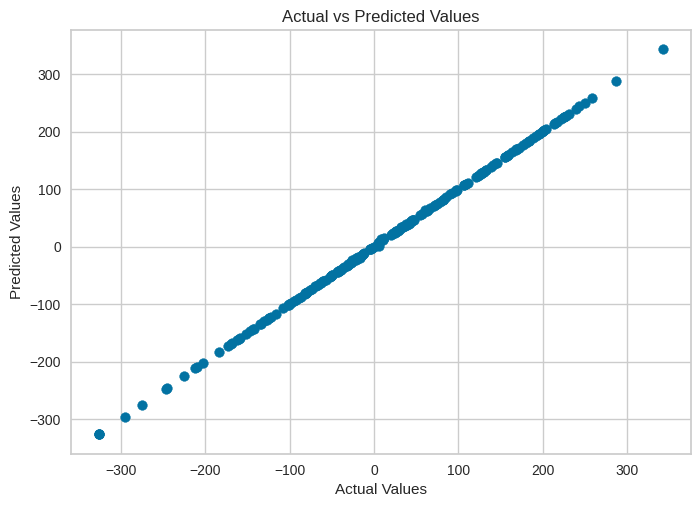

In [44]:

# Scatter plot of actual vs predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

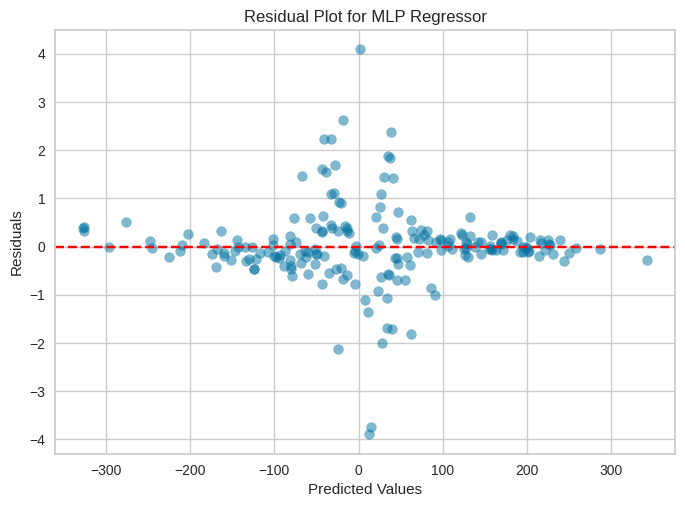

In [45]:
residuals = y_test - predictions
plt.scatter(predictions, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for MLP Regressor')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


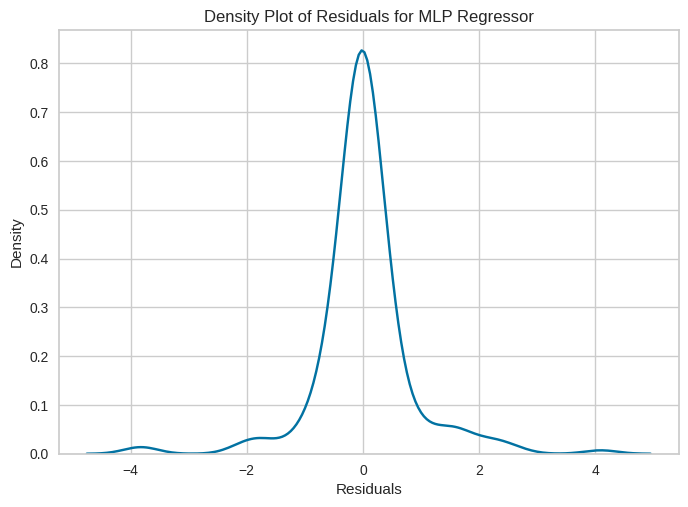

In [46]:
sns.kdeplot(residuals)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Density Plot of Residuals for MLP Regressor')
plt.show()


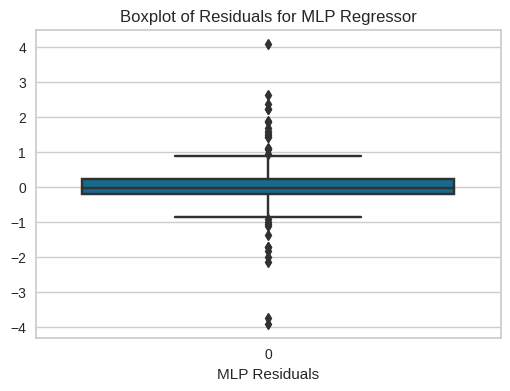

In [47]:
plt.figure(figsize=(6, 4))
sns.boxplot(residuals)
plt.xlabel('MLP Residuals')
plt.title('Boxplot of Residuals for MLP Regressor')
plt.show()


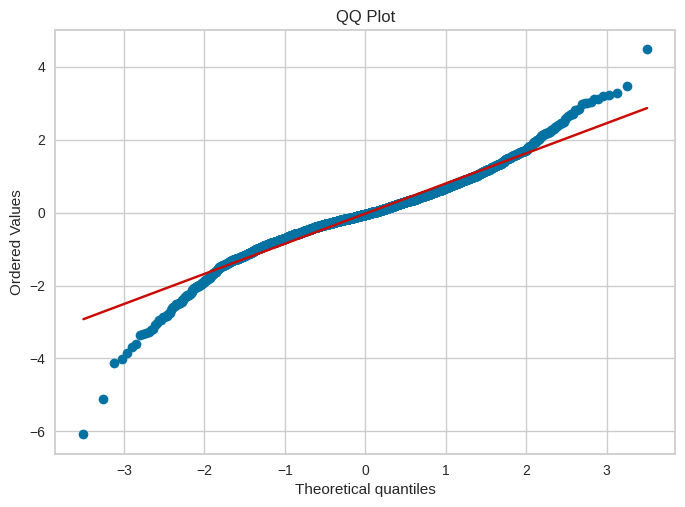

In [42]:
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()


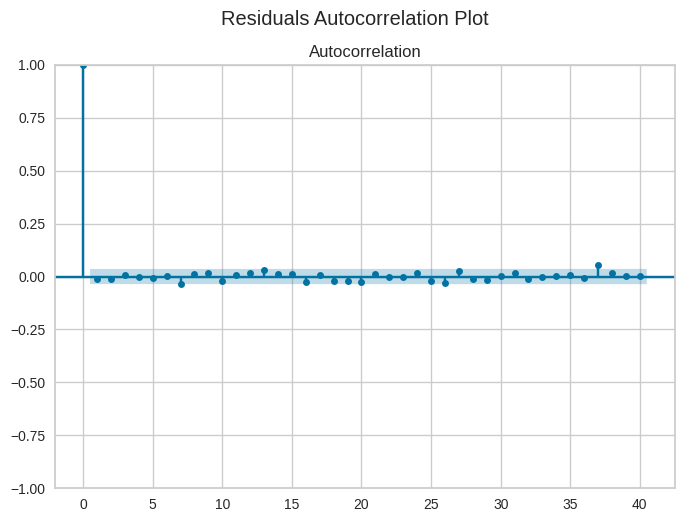

In [41]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(residuals, lags=40)
acf.suptitle('Residuals Autocorrelation Plot')
plt.show()



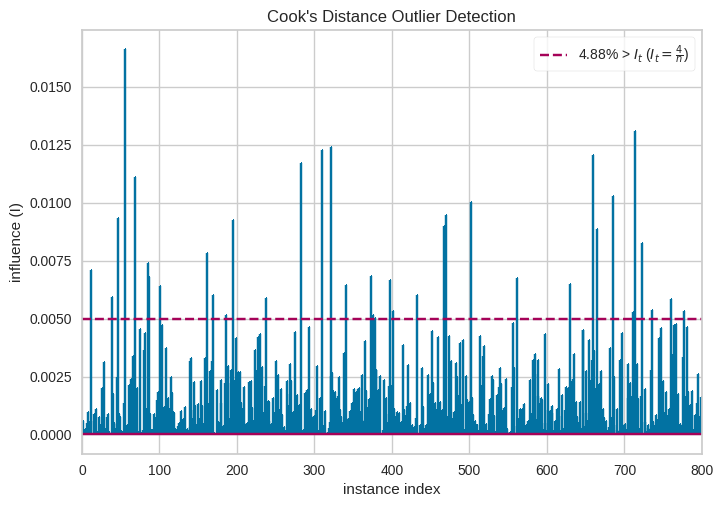

<Axes: title={'center': "Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [40]:
from yellowbrick.regressor import CooksDistance

visualizer = CooksDistance()
visualizer.fit(X_train_scaled, y_train)
visualizer.show()
# Points with higher Cook's distance have a larger influence on the model's parameters.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

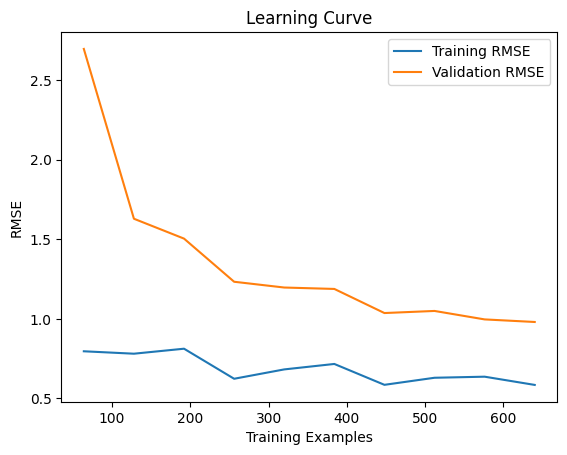

In [39]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_root_mean_squared_error', cv=5
)

train_scores_mean = np.mean(np.sqrt(-train_scores), axis=1)
val_scores_mean = np.mean(np.sqrt(-val_scores), axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training RMSE')
plt.plot(train_sizes, val_scores_mean, label='Validation RMSE')
plt.xlabel('Training Examples')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.legend()
plt.show()

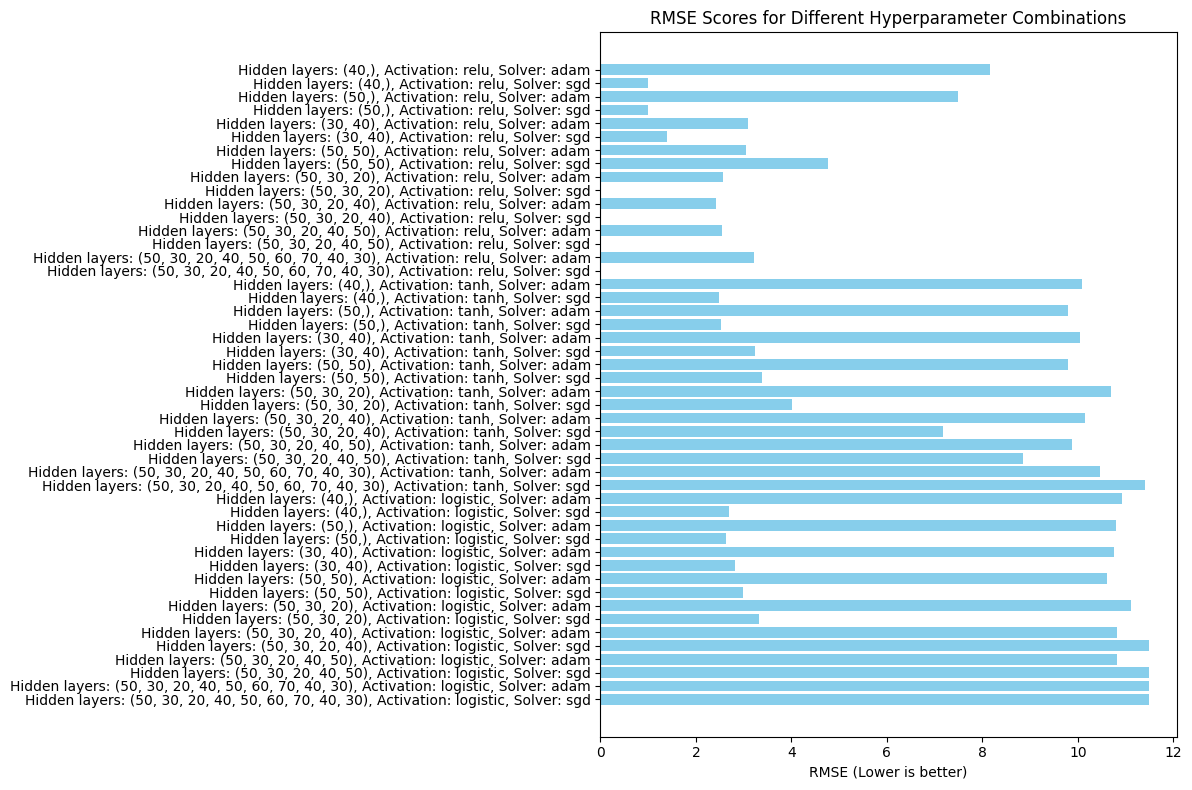

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting hyperparameters and their corresponding scores
results = grid_search.cv_results_
params = results['params']
scores = np.sqrt(-results['mean_test_score'])  # RMSE scores

# Extracting hyperparameters: hidden_layer_sizes, activation, and solver
hidden_layer_sizes = [str(param['hidden_layer_sizes']) for param in params]
activations = [param['activation'] for param in params]
solvers = [param['solver'] for param in params]

# Creating unique labels for each combination of hyperparameters
param_labels = [f"Hidden layers: {hl}, Activation: {act}, Solver: {solver}"
                for hl, act, solver in zip(hidden_layer_sizes, activations, solvers)]

# Plotting RMSE scores for different hyperparameter combinations
plt.figure(figsize=(12, 8))
plt.barh(param_labels, scores, color='skyblue')
plt.xlabel('RMSE (Lower is better)')
plt.title('RMSE Scores for Different Hyperparameter Combinations')
plt.gca().invert_yaxis()  # Invert y-axis to display the best scores on top
plt.tight_layout()
plt.show()


# Conclusion


**Relu** activation worked well as it is a simple non-linear function. It introduces non-linearity to the model, enabling it to learn complex patterns and relationships within the data.
 Compared to activation functions like tanh that can suffer from vanishing gradient problems, ReLU helps mitigate this issue to some extent.

**SGD** worked better as it updates model parameters based on the gradient computed from a single data point or a small batch of data points, which can lead to faster convergence compared to other optimization algorithms, especially in high-dimensional spaces or complex models.

Increasing hidden layers doesn't necessarily imply good performance of model as model can overfit the data. For eg: This we can clearly obtain using tanh(above graph)